In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost

%matplotlib inline

In [10]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [11]:
df.shape

(768, 9)

In [12]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# check if any null value is present
df.isnull().values.any()

False

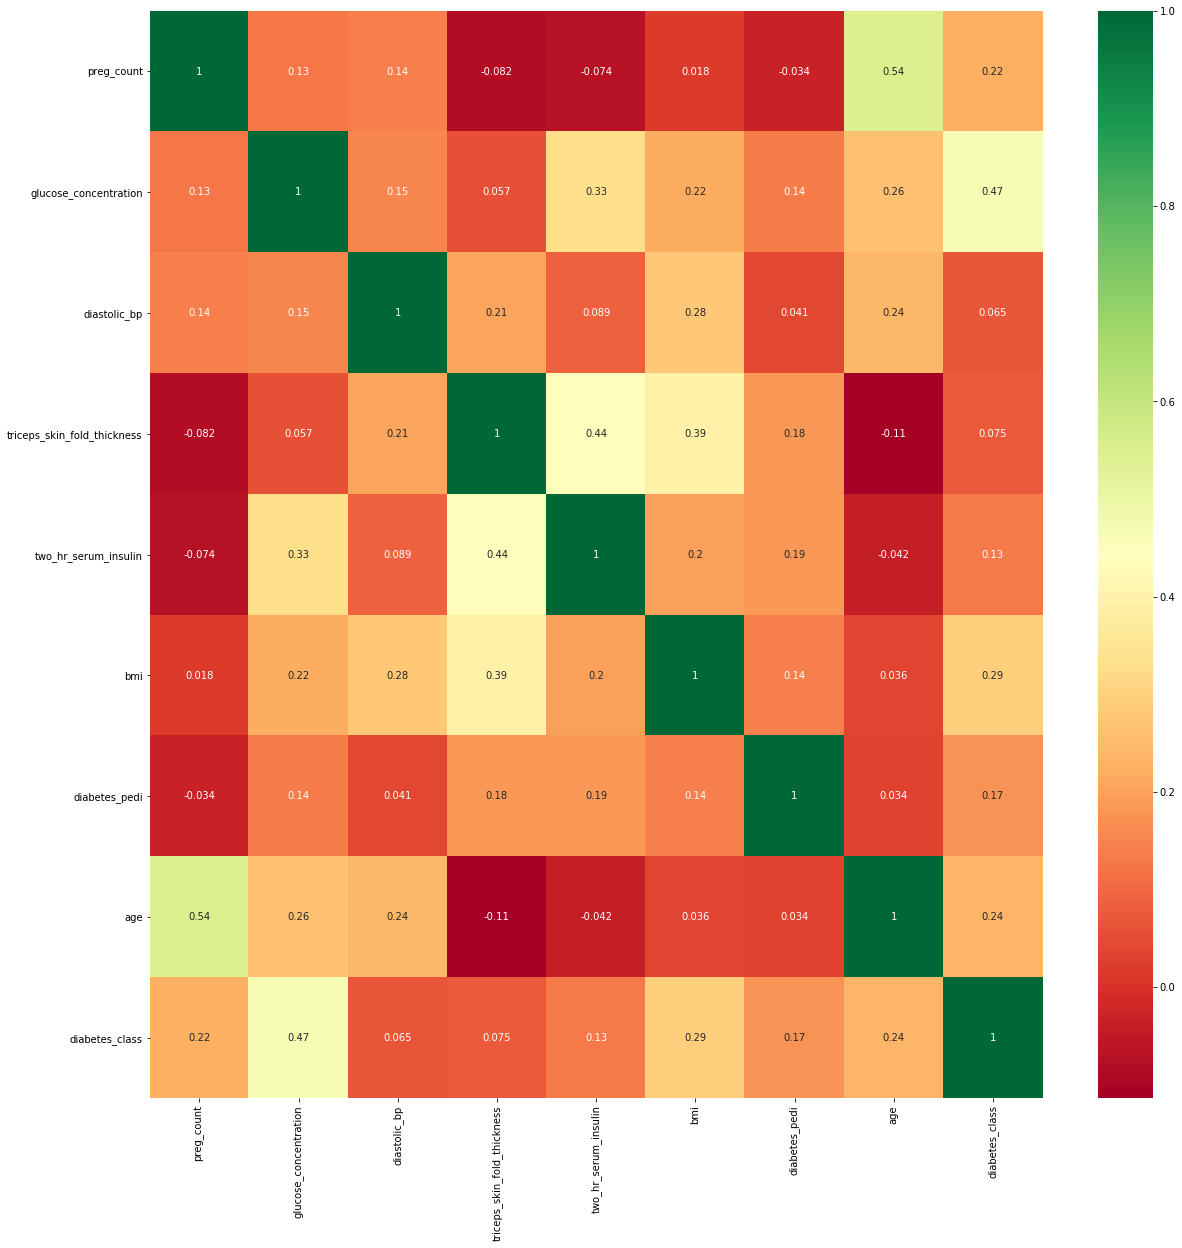

In [14]:
## Correlation
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
df.corr()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
preg_count,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_concentration,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps_skin_fold_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
two_hr_serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes_class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [18]:
diabetes_true_count = len(df.loc[df['diabetes_class'] == True])
diabetes_false_count = len(df.loc[df['diabetes_class'] == False])
(diabetes_true_count, diabetes_false_count)

(268, 500)

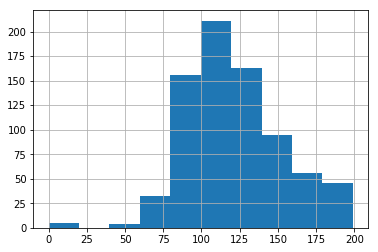

In [21]:
df['glucose_concentration'].hist()
plt.show()

In [22]:
df['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [23]:
# Separate diabetic and normal samples
diabetic = df.diabetes_class == 1
normal = df.diabetes_class == 0

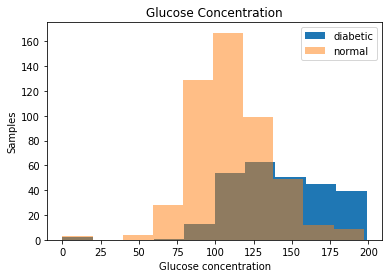

In [24]:
# Glucose concentration histogram
plt.hist(df[diabetic].glucose_concentration,label='diabetic')
plt.hist(df[normal].glucose_concentration,alpha=0.5,label='normal')
plt.title('Glucose Concentration')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')
plt.legend()
plt.show()

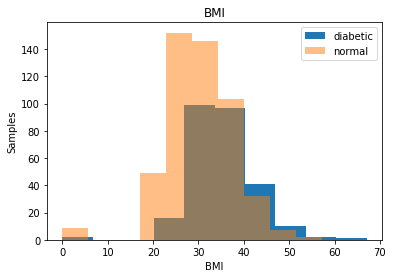

In [25]:
# BMI histogram
plt.hist(df[diabetic].bmi,label='diabetic')
plt.hist(df[normal].bmi,alpha=0.5,label='normal')
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.legend()
plt.show()

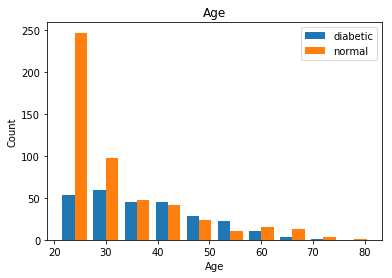

In [28]:
# Age histogram
plt.hist([df[diabetic].age,df[~diabetic].age],label=['diabetic','normal'])
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [33]:
# Check missing zeros
print("Total number of rows : {0}".format(len(df)))
print("Number of rows missing glucose_concentration: {0}".format(len(df.loc[df['glucose_concentration'] == 0])))
print("Number of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("Number of rows missing triceps_skin_fold_thickness: {0}".format(len(df.loc[df['triceps_skin_fold_thickness'] == 0])))
print("Number of rows missing two_hr_serum_insulin: {0}".format(len(df.loc[df['two_hr_serum_insulin'] == 0])))
print("Number of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("number of rows missing diabetes_pedi: {0}".format(len(df.loc[df['diabetes_pedi'] == 0])))
print("Number of rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

Total number of rows : 768
Number of rows missing glucose_concentration: 5
Number of rows missing diastolic_bp: 35
Number of rows missing triceps_skin_fold_thickness: 227
Number of rows missing two_hr_serum_insulin: 374
Number of rows missing bmi: 11
number of rows missing diabetes_pedi: 0
Number of rows missing age: 0


In [36]:
## Train Test Split
feature_columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
           'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']
predicted_class = ['diabetes_class']


X = df[feature_columns].values
y = df[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [37]:
# Fill in missing values
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
# Applying algorithms
classifier=xgboost.XGBClassifier()

In [40]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [41]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [47]:
classifier.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [53]:
y_pred=classifier.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

In [57]:
print(cm)
print(score)

[[114  30]
 [ 35  52]]
0.7186147186147186


In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train.ravel(),cv=10)

In [59]:
score

array([0.70909091, 0.7962963 , 0.7962963 , 0.75925926, 0.7037037 ,
       0.74074074, 0.79245283, 0.67924528, 0.75471698, 0.77358491])

In [60]:
score.mean()

0.7505387205387206

In [61]:
import pickle

# Dump the classifier with Pickle
diabetes_classifier = 'diabetes.pkl'
# Open the file to save as pkl file
diabetes_pkl = open(diabetes_classifier, 'wb')
pickle.dump(classifier, diabetes_pkl)
# Close the pickle instances
diabetes_pkl.close()